In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
from pandas import Series
from math import ceil

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':"10JUlTi7Vx5oZdteqJf3qUF7S5AQ--BnF"})   
downloaded.GetContentFile('vgsales.csv')
df = pd.read_csv('vgsales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# To analyse the **rating** with the number of **sales**

In [0]:
dfrat = df[df.Rating.notnull()]
dfrat.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [0]:
dfrat.groupby(df['Rating']).count()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Rating,,,,,,,,,,,,,,,,
AO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
E,3991,3991,3922,3991,3989,3991,3991,3991,3991,3991,2808,2808,3951,2375,3991,3991
E10+,1420,1420,1393,1420,1418,1420,1420,1420,1420,1420,1118,1118,1413,1043,1420,1420
EC,8,8,8,8,8,8,8,8,8,8,0,0,8,1,8,8
K-A,3,3,3,3,3,3,3,3,3,3,1,1,3,3,3,3
M,1563,1563,1536,1563,1562,1563,1563,1563,1563,1563,1483,1483,1560,1518,1563,1563
RP,3,3,1,3,3,3,3,3,3,3,3,3,2,2,3,3
T,2961,2961,2905,2961,2959,2961,2961,2961,2961,2961,2640,2640,2941,2561,2961,2961


In [0]:
masking = np.logical_not(dfrat['Rating'].isin(['AO','EC','K-A', 'RP']))
dfrat = dfrat[masking]
dfrat['Rating'].unique()

array(['E', 'M', 'T', 'E10+'], dtype=object)

In [0]:
df_group = dfrat[['NA_Sales','EU_Sales','JP_Sales','Global_Sales','Other_Sales']].groupby(dfrat['Rating']).sum()
df_group

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Other_Sales
Rating,,,,,
E,1293.26,710.25,198.11,2436.90,234.19
E10+,353.32,188.52,40.20,655.81,73.56
M,748.48,483.97,64.24,1473.84,177.10
T,759.75,427.03,151.40,1494.40,155.17


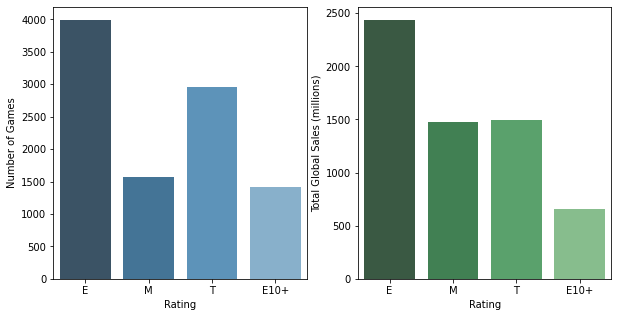

In [0]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x="Rating", data=dfrat, palette="Blues_d", ax=ax1)
ax1.set_ylabel("Number of Games")
sns.barplot(x="Rating", y="Global_Sales",data=dfrat, palette="Greens_d", estimator=sum, ax=ax2, ci=None)
ax2.set_ylabel("Total Global Sales (millions)")
plt.show()

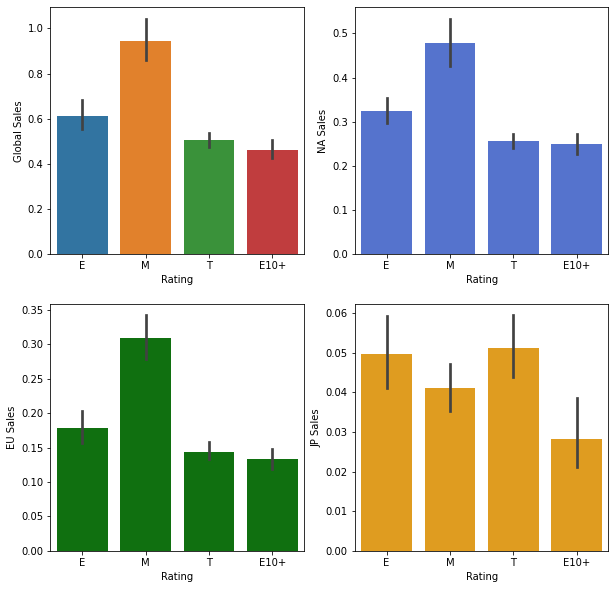

In [0]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
sns.barplot(x="Rating", y="Global_Sales", data=dfrat, ax=ax1)
ax1.set_ylabel("Global Sales")
sns.barplot(x="Rating", y="NA_Sales", color="royalblue", data=dfrat, ax=ax2)
ax2.set_ylabel("NA Sales")
sns.barplot(x="Rating", y="EU_Sales", color="green", data=dfrat, ax=ax3)
ax3.set_ylabel("EU Sales")
sns.barplot(x="Rating", y="JP_Sales", color="orange", data=dfrat, ax=ax4)
ax4.set_ylabel("JP Sales")
plt.show()

# Analysing **critic score**

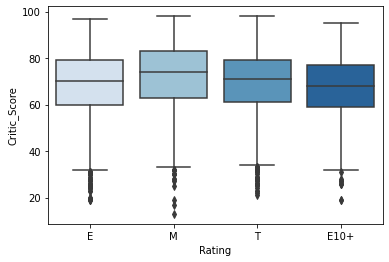

In [0]:
sns.boxplot(data=dfrat, x="Rating", y="Critic_Score", palette="Blues")
plt.show()

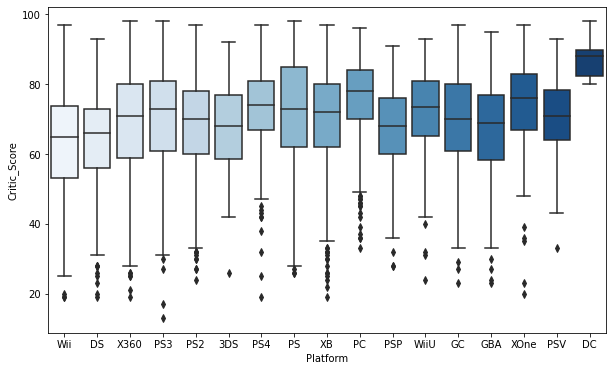

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(ax=ax, data=dfrat, x="Platform", y="Critic_Score", palette="Blues")
plt.show()

In [0]:
dfrat.query("Critic_Score < 20").Name

7219                 Nickelodeon Party Blast
9106                           Chicken Shoot
10016                               Rugby 15
10663    Leisure Suit Larry: Box Office Bust
12132                              Anubis II
12823                           Ride to Hell
13690                           Ride to Hell
15345                          Balls of Fury
Name: Name, dtype: object

In [0]:
dfrat.query("Critic_Score < 20").Publisher

7219                 Infogrames
9106     Zoo Digital Publishing
10016        Bigben Interactive
10663               Codemasters
12132                  Metro 3D
12823               Deep Silver
13690               Deep Silver
15345    Zoo Digital Publishing
Name: Publisher, dtype: object

In [0]:
df1 = df
df1 = df1.copy()
df1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
def score_grp(score):
    if score > 89:
        return '90-100'
    elif score > 79:
        return '80-89'
    elif score > 69:
        return '70-79'
    elif score > 59:
        return '60-69'
    elif score > 49:
        return '50-59'
    else:
        return '0-49'

In [0]:
dftemp = df.dropna(subset=['Critic_Score']).reset_index(drop=True)
dftemp['Score_Group'] = dftemp['Critic_Score'].apply(lambda x: score_grp(x))

In [0]:
def in_top(x):
    if x in pack:
        return x
    else:
        pass
def width(x):
    if x == 'Platform':
        return 14.4
    elif x == 'Publisher':
        return 11.3
    elif x == 'Genre':
        return 13.6

def height(x):
    if x == 'Genre':
        return 8
    else:
        return 9

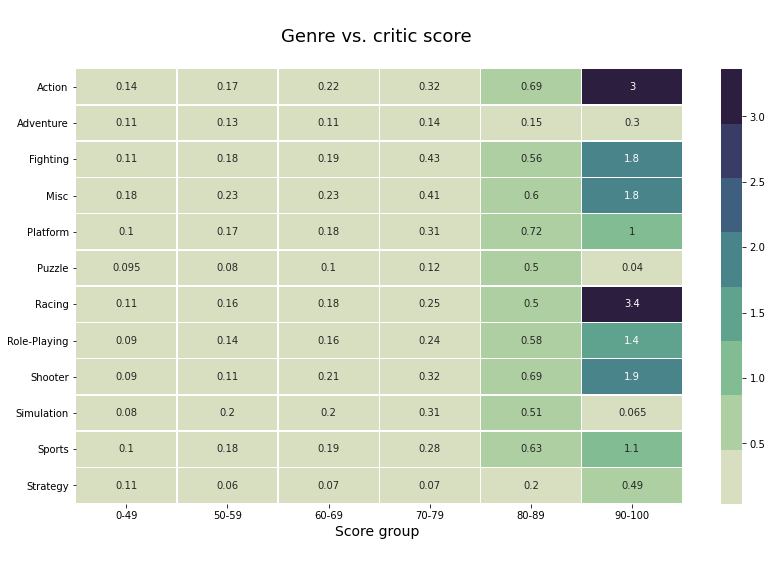

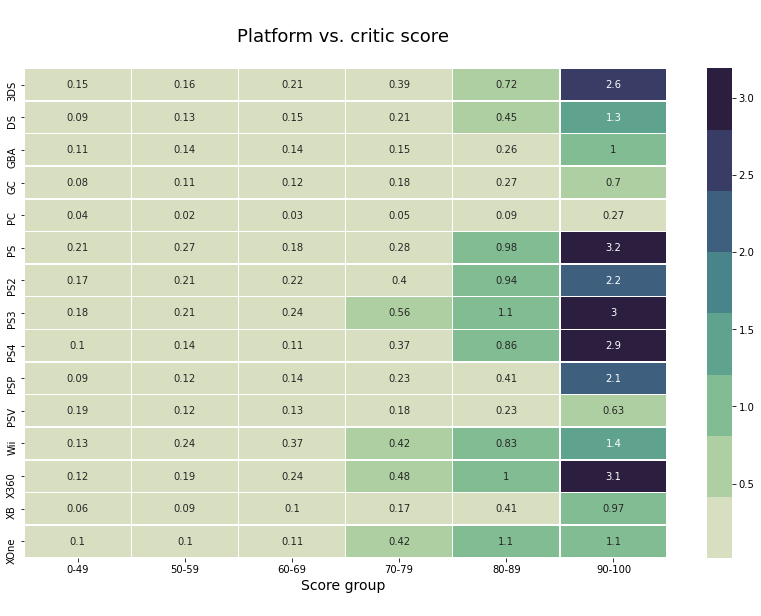

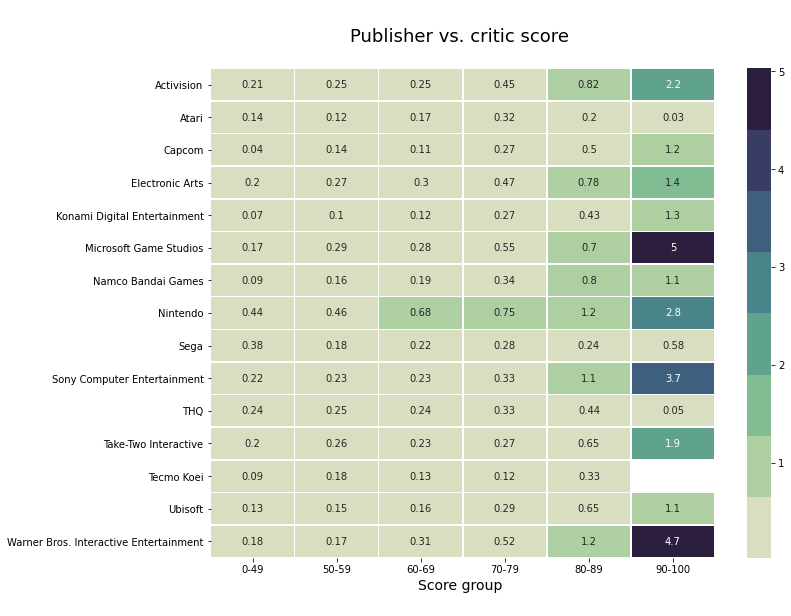

In [0]:
cols = ['Genre', 'Platform', 'Publisher']
for col in cols:
    pack = []
    top = dftemp[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()[:15]
    for x in top[col]:
        pack.append(x)
    dftemp[col] = dftemp[col].apply(lambda x: in_top(x))
    dfh_platform = dftemp[[col, 'Score_Group', 'Global_Sales']].groupby([col, 'Score_Group']).median().reset_index().pivot(col, "Score_Group", "Global_Sales")
    plt.figure(figsize=(width(col), height(col)))
    cmap=sns.cubehelix_palette(8, start=.5, rot=-.75)
    sns.heatmap(dfh_platform, annot=True, fmt=".2g", linewidths=.5, cmap=cmap).set_title((' \n'+col+' vs. critic score \n'), fontsize=18)
    plt.ylabel('', fontsize=14)
    plt.xlabel('Score group \n', fontsize=14)
    pack = []

In [0]:
cols = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
for col in cols:
    uniques = df[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1

    for k, v in uniques_dict.items():
        df.loc[df[col] == k, col] = v

In [0]:
dff = df[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
dff = dff.dropna().reset_index(drop=True)
dff = dff.astype('float64')

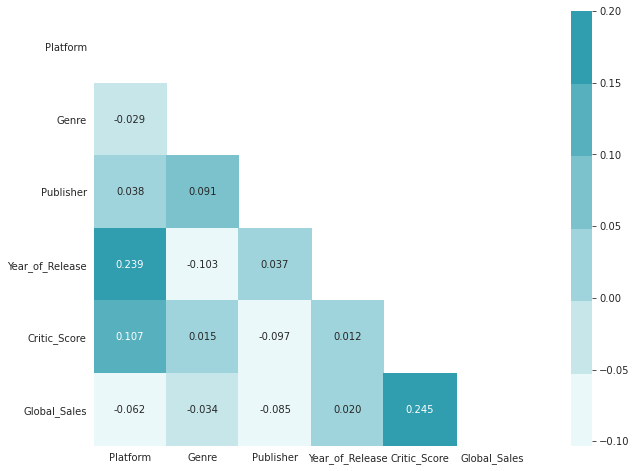

In [0]:
mask2 = np.zeros_like(dff.corr())
mask2[np.triu_indices_from(mask2)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
with sns.axes_style("white"):
    fig, ax = plt.subplots(1,1, figsize=(15,8))
    ax = sns.heatmap(dff.corr(), mask=mask2, vmax=0.2, square=True, annot=True, fmt=".3f", cmap=cmap)

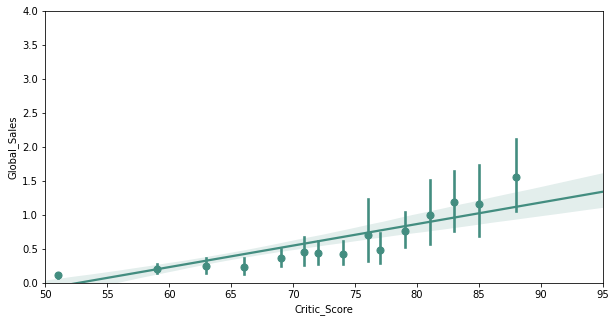

In [0]:
fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=dff.loc[dff.Year_of_Release >= 2014],truncate=True, x_bins=15, color="#438D80").set(ylim=(0, 4), xlim=(50, 95))
plt.show()

In [0]:
df_model = df1[['Name','Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
df_model = df_model.dropna().reset_index(drop=True)
df2 = df_model[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
df2['Hit'] = df2['Global_Sales']
df2.drop('Global_Sales', axis=1, inplace=True)

In [0]:
def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0

df2['Hit'] = df2['Hit'].apply(lambda x: hit(x))

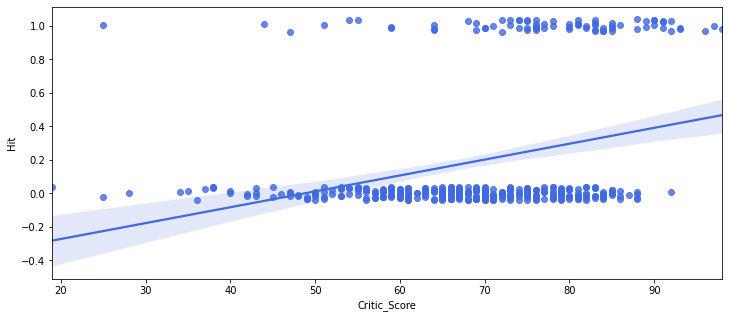

In [0]:
n = ceil(0.05 * len(df2['Hit']))
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Hit", data=df2.sample(n=n), n_boot=500, y_jitter=.04, color="#4169E1")
plt.show()

# **Prediction Model**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from pandas import get_dummies

In [0]:
df2.head()

,Platform,Genre,Publisher,Year_of_Release,Critic_Score,Hit
0,Wii,Sports,Nintendo,2006.0,76.0,1
1,Wii,Racing,Nintendo,2008.0,82.0,1
2,Wii,Sports,Nintendo,2009.0,80.0,1
3,DS,Platform,Nintendo,2006.0,89.0,1
4,Wii,Misc,Nintendo,2006.0,58.0,1


In [0]:
df_copy = pd.get_dummies(df2)

In [0]:
df_copy.head()

,Year_of_Release,Critic_Score,Hit,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_2D Boy,Publisher_3DO,Publisher_505 Games,Publisher_5pb,Publisher_AQ Interactive,Publisher_ASCII Entertainment,...,Publisher_Telegames,Publisher_Telltale Games,Publisher_Tetris Online,Publisher_The Adventure Company,Publisher_Titus,Publisher_Tomy Corporation,Publisher_Touchstone,Publisher_Trion Worlds,Publisher_Tripwire Interactive,Publisher_Tru Blu Entertainment,Publisher_UFO Interactive,Publisher_Ubisoft,Publisher_Ubisoft Annecy,Publisher_Universal Interactive,Publisher_Unknown,Publisher_Valcon Games,Publisher_Valve,Publisher_Valve Software,Publisher_Vatical Entertainment,Publisher_Victor Interactive,Publisher_Vir2L Studios,Publisher_Virgin Interactive,Publisher_Visco,Publisher_Vivendi Games,Publisher_Wanadoo,Publisher_Wargaming.net,Publisher_Warner Bros. Interactive Entertainment,Publisher_White Park Bay Software,Publisher_XS Games,Publisher_Xicat Interactive,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yuke's,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_id Software,Publisher_inXile Entertainment
0,2006.0,76.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2008.0,82.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2009.0,80.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2006.0,89.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006.0,58.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_ml = df_copy
y = df_ml['Hit'].values
df_ml = df_ml.drop(['Hit'],axis=1)
X = df_ml.values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [0]:
clf=DecisionTreeClassifier(max_depth=1, random_state=101, max_features=None, min_samples_leaf=15)

In [0]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [0]:
y_pred_clf=clf.predict(X_test)

In [0]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1997
           1       0.00      0.00      0.00       398

    accuracy                           0.83      2395
   macro avg       0.42      0.50      0.45      2395
weighted avg       0.70      0.83      0.76      2395



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


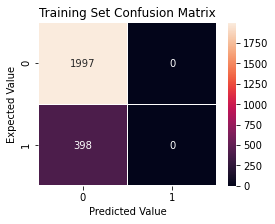

In [0]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_clf), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Training Set Confusion Matrix')
plt.show()

In [0]:
clff=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, algorithm='SAMME')

In [0]:
clff.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [0]:
y_pred = clff.predict(X_test)
print(clff.score(X_test,y_test))

0.8651356993736952


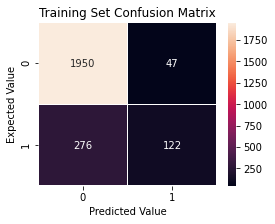

In [0]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Training Set Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      1997
           1       0.72      0.31      0.43       398

    accuracy                           0.87      2395
   macro avg       0.80      0.64      0.68      2395
weighted avg       0.85      0.87      0.84      2395

